In [1]:
import pandas as pd
import os
import json


from IPython.display import display

## get files:

In [2]:
questionare_path = "../res/user_data/questionare.xlsx"
participant_order_path = "../res/participant_order.xlsx"
user_data_path = "../res/user_data/"

chat_bot_files  = [f for f in os.listdir(user_data_path) if f.endswith('.json')]

df_questionare = pd.read_excel(open(questionare_path, 'rb'), index_col=0)
df_participant_order = pd.read_excel(open(participant_order_path, 'rb'), index_col=0)



## questionare data preparation:

In [3]:
question_labels = ["The chatbot’s personality was realistic and engaging",
                   "The chatbot seemed too robotic",
                   "The chatbot was welcoming during initial setup",
                   "The chatbot seemed very unfriendly",
                   "The chatbot explained its scope and purpose well",
                   "The chatbot gave no indication as to its purpose",
                   "The chatbot was easy to navigate","It would be easy to get confused when using the chatbot",
                   "The chatbot understood me well","The chatbot failed to recognise a lot of my inputs",
                   "Chatbot responses were useful, appropriate and informative","Chatbot responses were irrelevant",
                   "The chatbot coped well with any errors or mistakes",
                   "The chatbot seemed unable to handle any errors",
                   "The chatbot was very easy to use",
                   "The chatbot was very complex"
                   ]
question_labels_2 = [x + "2" for x in question_labels]
rename_dict = {v: k for k, v in zip(question_labels, question_labels_2)}



In [4]:
df = df_questionare.merge(df_participant_order, left_on="Participant code", right_on="Participant number")
df.drop(columns=["Please complete the first three trials", "Please complete the last three trials", 'Task 1', 'Task 2', 'Task 3', 'Task 4', 'Task 5', 'Task 6'], inplace=True)
df.drop(columns=["​Experiment Description\n\nThe aim of the project is to determine how the communication style of a chatbot impacts the perceived quality of it. The communication styles vary on formality of language..."], inplace=True)
#print(df.columns)

In [5]:
# create df for genz
df_questionare_genz_1 = df[df["Chatbot group start"].str.match("Informal")]
df_questionare_genz_1 = df_questionare_genz_1.drop(columns=question_labels_2)
df_questionare_genz_2 = df[df["Chatbot group start"].str.match("Formal")]
df_questionare_genz_2 = df_questionare_genz_2.drop(columns=question_labels)
df_questionare_genz_2  = df_questionare_genz_2.rename(columns=rename_dict)


df_questionare_genz = pd.concat([df_questionare_genz_1, df_questionare_genz_2 ])
df_questionare_genz["language"] = "genz"
print(len(df_questionare_genz)) 


12


In [6]:
# same as above get df for formal
df_questionare_formal_1 = df[df["Chatbot group start"].str.match("Formal")]
df_questionare_formal_1 = df_questionare_formal_1.drop(columns=question_labels_2)
df_questionare_formal_2 = df[df["Chatbot group start"].str.match("Informal")]
df_questionare_formal_2 = df_questionare_formal_2.drop(columns=question_labels)
df_questionare_formal_2 = df_questionare_formal_2.rename(columns=rename_dict)

df_questionare_formal = pd.concat([df_questionare_formal_1, df_questionare_formal_2 ])
df_questionare_formal = df_questionare_formal.drop(columns=["Chatbot group start"])
df_questionare_formal["language"] = "formal"
#print((df_questionare_formal.columns)) 

In [7]:
df_questionare = pd.concat([df_questionare_genz, df_questionare_formal])
df_questionare = df_questionare.set_index(["Participant code", "language"])
df_questionare = df_questionare.drop(columns=["Chatbot group start"])


In [8]:
# 'Chatbot group start' gives the order of the user did the language options

In [9]:
def calc_CUQ_score(df):
    # step 1:
    agree_scores = {
        "Strongly agree": 5,
        "Agree": 4,
        "Neutral": 3,
        "Disagree": 2,
        "Strongly disagree": 1
    }
    # step 2 and 3:
    # odd and even are swapped, cause we count from 0
    # step 2
    positiv_score = 0
    for i in range(0,len(question_labels), 2):
        positiv_score += agree_scores[df[question_labels[i]]]
    # step 3:
    negative_score = 0
    for i in range(1,len(question_labels), 2):
        negative_score += agree_scores[df[question_labels[i]]]
    
    #step 4:
    positiv_score = positiv_score - 8
    # step 5:
    negative_score = 40 - negative_score
    # step 6:
    cuq_score = positiv_score + negative_score 
    #You should now have a score out of 64 
    if cuq_score > 64:
        raise ValueError("CUQ score is greater than 64")
    # step 7:
    cuq_score = cuq_score / 64 
    cuq_score = cuq_score * 100
    return cuq_score


for index, row in df_questionare.iterrows():
    print( calc_CUQ_score(row))
    df_questionare.at[index, "CUQ"] = calc_CUQ_score(row)




37.5
46.875
18.75
68.75
50.0
70.3125
65.625
56.25
54.6875
48.4375
64.0625
62.5
62.5
40.625
43.75
53.125
43.75
45.3125
40.625
51.5625
53.125
64.0625
60.9375
70.3125


In [10]:
print("Questionare Dataset:")
display(df_questionare)

Questionare Dataset:


,,Start time,Completion time,Email,Name,Language,Last modified time,Age,The chatbot’s personality was realistic and engaging,The chatbot seemed too robotic,The chatbot was welcoming during initial setup,...,It would be easy to get confused when using the chatbot,The chatbot understood me well,The chatbot failed to recognise a lot of my inputs,"Chatbot responses were useful, appropriate and informative",Chatbot responses were irrelevant,The chatbot coped well with any errors or mistakes,The chatbot seemed unable to handle any errors,The chatbot was very easy to use,The chatbot was very complex,CUQ
Participant code,language,,,,,,,,,,,,,,,,,,,,,
6,genz,2023-10-24 14:32:05,2023-10-24 14:47:12,anonymous,NaN,NaN,NaN,23,Agree,Strongly agree,Agree,...,Strongly agree,Disagree,Strongly agree,Neutral,Agree,Strongly disagree,Strongly agree,Disagree,Disagree,37.5000
2,genz,2023-10-25 17:42:31,2023-10-25 17:55:19,anonymous,NaN,NaN,NaN,28,Neutral,Agree,Neutral,...,Agree,Disagree,Neutral,Agree,Disagree,Strongly disagree,Neutral,Neutral,Disagree,46.8750
8,genz,2023-10-25 18:54:52,2023-10-25 23:33:20,anonymous,NaN,NaN,NaN,27,Disagree,Neutral,Agree,...,Strongly agree,Strongly disagree,Strongly agree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly agree,Strongly disagree,Agree,18.7500
24,genz,2023-10-26 00:26:19,2023-10-26 03:32:18,anonymous,NaN,NaN,NaN,23,Agree,Neutral,Agree,...,Neutral,Agree,Disagree,Agree,Disagree,Agree,Neutral,Agree,Disagree,68.7500
20,genz,2023-10-26 14:05:23,2023-10-26 14:27:20,anonymous,NaN,NaN,NaN,24,Agree,Neutral,Agree,...,Agree,Disagree,Disagree,Neutral,Agree,Disagree,Disagree,Neutral,Neutral,50.0000
25,genz,2023-10-24 16:25:52,2023-10-24 17:05:53,anonymous,NaN,NaN,NaN,25,Strongly agree,Strongly disagree,Strongly agree,...,Agree,Agree,Neutral,Agree,Disagree,Disagree,Disagree,Agree,Agree,70.3125
1,genz,2023-10-24 21:38:57,2023-10-24 21:52:38,anonymous,NaN,NaN,NaN,24,Agree,Disagree,Agree,...,Agree,Agree,Neutral,Agree,Disagree,Neutral,Neutral,Agree,Neutral,65.6250
9,genz,2023-10-25 18:47:38,2023-10-25 19:02:51,anonymous,NaN,NaN,NaN,26,Agree,Disagree,Agree,...,Disagree,Disagree,Agree,Disagree,Disagree,Disagree,Agree,Agree,Disagree,56.2500
3,genz,2023-10-25 20:01:19,2023-10-25 20:19:25,anonymous,NaN,NaN,NaN,60,Neutral,Disagree,Agree,...,Disagree,Strongly disagree,Agree,Neutral,Disagree,Disagree,Neutral,Agree,Disagree,54.6875


In [11]:
# user id

# total time (average of tasks with same language)
# number of suggestions (average of tasks with same language)
# number of turns (average of tasks with same language)
# number_of_suggestions
# number_of_restarts
df_chat = pd.DataFrame(columns=["user_id",  "language",  "number_of_turns", "time", "number_of_suggestions", "number_of_restarts"])
for chat_data in chat_bot_files:
    chat_data = json.load(open(user_data_path + chat_data))
    row = df_chat.loc[(df_chat["user_id"] == chat_data["user_id"] ) & (df_chat["language"] == chat_data["configuration"]["language"]  ) ]
    total_time = sum([x["response_seconds"] for x in chat_data["turns"]])
    if row.empty:

        row = pd.DataFrame([[ chat_data["user_id"],  chat_data["configuration"]["language"],  len(chat_data["turns"]) , total_time, chat_data["number_suggestions"], chat_data["number_restart"] ] ], 
                           columns=["user_id",  "language", "number_of_turns", "time", "number_of_suggestions", "number_of_restarts"])

        df_chat = pd.concat([df_chat, row])
    else:
        row.loc[0,"number_of_turns"] = row.loc[0,"number_of_turns"] + len(chat_data["turns"])
        row.loc[0,"time"] = row.loc[0,"time"] + total_time
        row.loc[0,"number_of_suggestions"] = row.loc[0,"number_of_suggestions"] + chat_data["number_suggestions"]
        row.loc[0, "number_of_restarts"] = row.loc[0, "number_of_restarts"] + chat_data["number_restart"]
        df_chat.loc[(df_chat["user_id"] == chat_data["user_id"] ) & (df_chat["language"] == chat_data["configuration"]["language"]  ) ] = row

df_chat["number_of_turns"] = df_chat["number_of_turns"] / 3
df_chat["time"] = df_chat["time"] / 3
df_chat["number_of_suggestions"] = df_chat["number_of_suggestions"] / 3
df_chat["number_of_restarts"] = df_chat["number_of_restarts"] / 3



df_chat["language"] = df_chat['language'].str.lower()
#df_chat.rename(columns={"user_id": "Participant code"}, inplace=True)
df_chat.set_index(["user_id", "language"], inplace=True)
print("Chatbot Dataframe:")
display(df_chat)

Chatbot Dataframe:


,,number_of_turns,time,number_of_suggestions,number_of_restarts
user_id,language,,,,
20,formal,9.333333,97.563569,0.666667,0.0
23,formal,7.666667,75.644213,0.666667,0.333333
12,genz,11.0,100.413311,2.0,0.333333
11,formal,12.333333,93.976582,1.333333,0.333333
6,genz,12.333333,83.626476,1.0,1.333333
20,genz,10.666667,92.969189,0.666667,0.666667
4,formal,4.666667,42.064284,0.666667,0.333333
8,genz,5.666667,93.257106,0.0,0.0
21,formal,8.666667,99.911734,0.666667,0.666667


In [12]:
df_chat.reset_index(inplace=True)
df_questionare.reset_index(inplace=True)

In [13]:
### the index -unique identifier- of df is (participant code, language)
df_questionare["index"] = df_questionare["Participant code"].astype(str) + df_questionare["language"]
df_chat["index"] = df_chat["user_id"] + df_chat["language"]
df = df_questionare.merge(df_chat, left_on=["index"], right_on=["index"])
df = df.drop(columns=["index", "language_y", "user_id"] )# deleting other user id, so we dont need to reorder to have it at the first position..
df = df.rename(columns={"language_x": "language", "Participant code": "user_id"})
#df.reset_index (inplace=True)  # cause idk pandas i cant work with this index
#df.set_index(["Participant code", "language"], inplace=True)
print("Merged Dataframe:")
display(df)


Merged Dataframe:


,user_id,language,Start time,Completion time,Email,Name,Language,Last modified time,Age,The chatbot’s personality was realistic and engaging,...,Chatbot responses were irrelevant,The chatbot coped well with any errors or mistakes,The chatbot seemed unable to handle any errors,The chatbot was very easy to use,The chatbot was very complex,CUQ,number_of_turns,time,number_of_suggestions,number_of_restarts
0,6,genz,2023-10-24 14:32:05,2023-10-24 14:47:12,anonymous,NaN,NaN,NaN,23,Agree,...,Agree,Strongly disagree,Strongly agree,Disagree,Disagree,37.5000,12.333333,83.626476,1.0,1.333333
1,2,genz,2023-10-25 17:42:31,2023-10-25 17:55:19,anonymous,NaN,NaN,NaN,28,Neutral,...,Disagree,Strongly disagree,Neutral,Neutral,Disagree,46.8750,8.0,94.155803,0.0,0.666667
2,8,genz,2023-10-25 18:54:52,2023-10-25 23:33:20,anonymous,NaN,NaN,NaN,27,Disagree,...,Strongly disagree,Strongly disagree,Strongly agree,Strongly disagree,Agree,18.7500,5.666667,93.257106,0.0,0.0
3,20,genz,2023-10-26 14:05:23,2023-10-26 14:27:20,anonymous,NaN,NaN,NaN,24,Agree,...,Agree,Disagree,Disagree,Neutral,Neutral,50.0000,10.666667,92.969189,0.666667,0.666667
4,25,genz,2023-10-24 16:25:52,2023-10-24 17:05:53,anonymous,NaN,NaN,NaN,25,Strongly agree,...,Disagree,Disagree,Disagree,Agree,Agree,70.3125,11.333333,137.616361,2.0,0.333333
5,1,genz,2023-10-24 21:38:57,2023-10-24 21:52:38,anonymous,NaN,NaN,NaN,24,Agree,...,Disagree,Neutral,Neutral,Agree,Neutral,65.6250,8.0,125.788085,0.0,0.0
6,9,genz,2023-10-25 18:47:38,2023-10-25 19:02:51,anonymous,NaN,NaN,NaN,26,Agree,...,Disagree,Disagree,Agree,Agree,Disagree,56.2500,14.333333,148.066333,0.666667,0.0
7,3,genz,2023-10-25 20:01:19,2023-10-25 20:19:25,anonymous,NaN,NaN,NaN,60,Neutral,...,Disagree,Disagree,Neutral,Agree,Disagree,54.6875,11.666667,220.133241,0.666667,0.0
8,7,genz,2023-10-25 22:35:34,2023-10-25 23:10:42,anonymous,NaN,NaN,NaN,26,Disagree,...,Neutral,Disagree,Agree,Neutral,Disagree,48.4375,15.666667,115.634526,1.666667,1.0
9,19,genz,2023-10-26 12:51:57,2023-10-26 13:06:29,anonymous,NaN,NaN,NaN,23,Strongly agree,...,Disagree,Disagree,Disagree,Agree,Disagree,64.0625,6.666667,55.929995,1.0,0.333333


Text(0, 0.5, 'user satisfaction (cuq)')

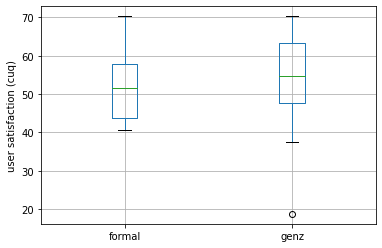

In [14]:
import matplotlib.pyplot as plt

cuq_formal = df[df["language"].str.match("formal")]["CUQ"]

cuq_genz = df[df["language"].str.match("genz")]["CUQ"]
cuq_plot = pd.DataFrame({'formal':cuq_formal,
                   'genz':cuq_genz})
#df_plot = df[df["language"].str.match("formal")][]

#print (cuq_formal.columns)
#df_plot = df_plot.set_index(["user_id", "language"])

bplot = cuq_plot.boxplot()
bplot.set_ylabel('user satisfaction (cuq)')
#cuq_genz.plot()
#df.plot()

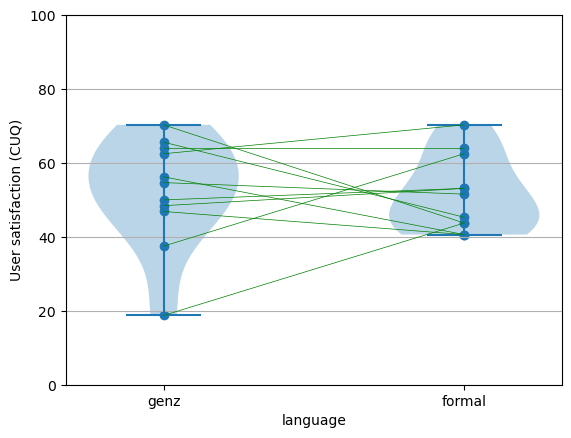

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as lines


fig, axes = plt.subplots()
df_languages = pd.DataFrame({"formal": df[df["language"].str.match("formal")]["CUQ"].values,
                          "genz": df[df["language"].str.match("genz")]["CUQ"].values })
axes.scatter(data=df, x="language", y="CUQ")
axes.violinplot(dataset = df_languages, positions=[1,0])
axes.set_title('')
axes.yaxis.grid(True)
axes.set_xlabel('language')
axes.set_ylim(0, 100)
axes.set_ylabel('User satisfaction (CUQ)')
dots = axes.collections[0].get_offsets()
for dot_index in range(int(len(dots) / 2)):
    line = lines.Line2D([ 0,1], [dots[dot_index][1],dots[dot_index + int(len(dots) / 2)][1]],
                     color='green', linestyle='-', linewidth=0.5)
    
    axes.add_line(line)

#ax = df.plot.scatter(x='language', y='CUQ', style='b')
plt.show()

some statiscitcs:

In [16]:
total = pd.concat([df_languages["genz"],df_languages["formal"]])
print("mean of genz and formal and total:", np.mean(df_languages["genz"]), np.mean(df_languages["formal"]), np.mean(total))
print("median of genz and formal and total:", np.median(df_languages["genz"]), np.median(df_languages["formal"]), np.median(total))
print("standard deviation of genz and formal and total:", np.std(df_languages["genz"]), np.std(df_languages["formal"]), np.std(total))

mean of genz and formal and total: 52.27272727272727 51.70454545454545 51.98863636363637
median of genz and formal and total: 54.6875 51.5625 52.34375
standard deviation of genz and formal and total: 14.01291188083923 9.688291423284053 12.049607988891191


In [17]:
import scipy.stats as stats
print("ttest:" , stats.ttest_ind(a = df_languages["formal"], b= df_languages["genz"]))
print("wilcoxon:" , stats.wilcoxon(x = df_languages["formal"], y= df_languages["genz"]))


ttest: TtestResult(statistic=-0.10546786488216772, pvalue=0.9170551955280373, df=20.0)
wilcoxon: WilcoxonResult(statistic=26.5, pvalue=0.9187074054282889)


/home/robin/anaconda3/envs/uu_courses/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


Time Stats

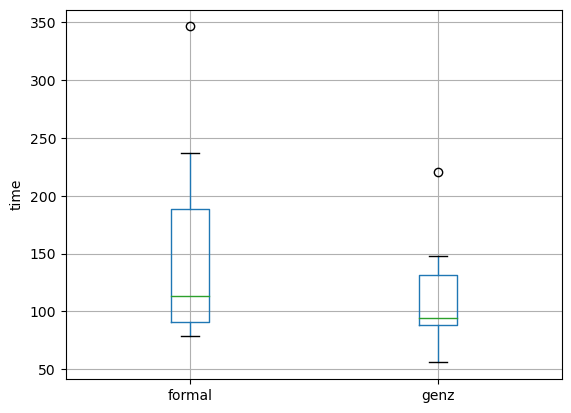

In [18]:
import matplotlib.pyplot as plt

time_formal = df[df["language"].str.match("formal")]["time"]

time_genz = df[df["language"].str.match("genz")]["time"]
time_plot = pd.DataFrame({'formal':time_formal,
                   'genz':time_genz})
#df_plot = df[df["language"].str.match("formal")][]

#print (cuq_formal.columns)
#df_plot = df_plot.set_index(["user_id", "language"])

bplot = time_plot.boxplot()
bplot.set_ylabel('time')
#cuq_genz.plot()
#df.plot()
plt.show()

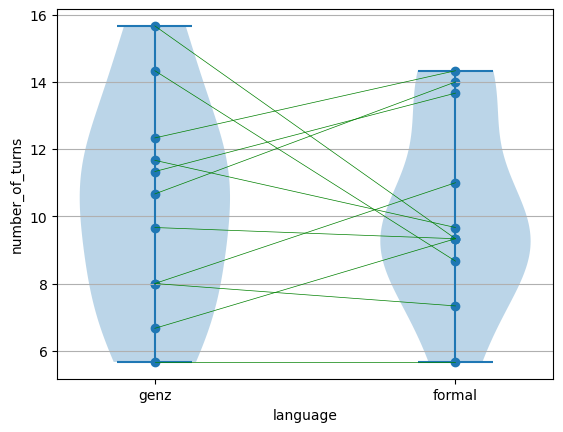

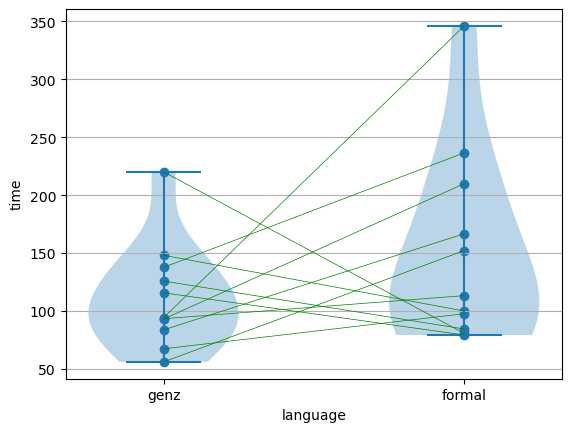

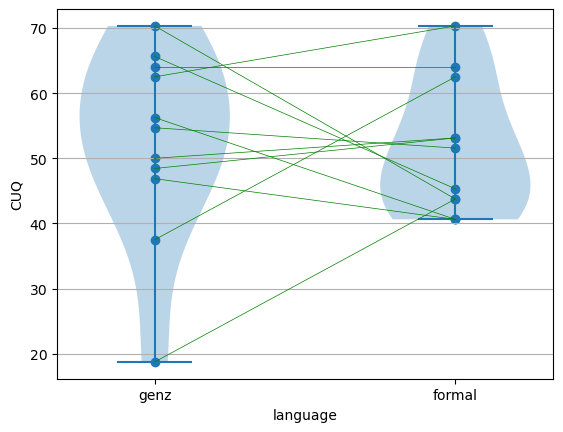

In [19]:
import visualization as vis
import importlib
importlib.reload(vis)



fig, axes = vis.violin_with_dots(df,x="language", y="number_of_turns") #, title="Time", ylabel="Time (s)", xlabel="Language"
fig, axes = vis.violin_with_dots(df,x="language", y="time") #, title="Time", ylabel="Time (s)", xlabel="Language"
fig, axes = vis.violin_with_dots(df,x="language", y="CUQ") #, title="Time", ylabel="Time (s)", xlabel="Language"


In [20]:
total = pd.concat([time_df_languages["genz"],time_df_languages["formal"]])
print("mean of genz and formal and total:", np.mean(time_df_languages["genz"]), np.mean(time_df_languages["formal"]), np.mean(total))
print("median of genz and formal and total:", np.median(time_df_languages["genz"]), np.median(time_df_languages["formal"]), np.median(total))
print("standard deviation of genz and formal and total:", np.std(time_df_languages["genz"]), np.std(time_df_languages["formal"]), np.std(total))

NameError: name 'time_df_languages' is not defined

In [ ]:
import scipy.stats as stats
print("ttest:" , stats.ttest_ind(a = time_df_languages["formal"], b= time_df_languages["genz"]))
print("wilcoxon:" , stats.wilcoxon(x = time_df_languages["formal"], y= time_df_languages["genz"]))


ttest: TtestResult(statistic=1.5156474531673687, pvalue=0.14697286387769315, df=18.0)
wilcoxon: WilcoxonResult(statistic=17.0, pvalue=0.322265625)


Turns taken Stats

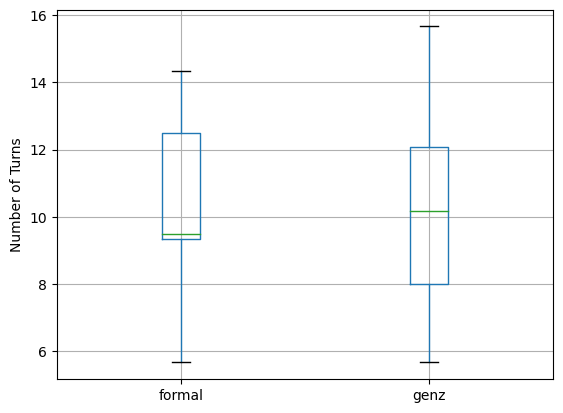

In [ ]:
import matplotlib.pyplot as plt

turns_formal = df[df["language"].str.match("formal")]["number_of_turns"]
turns_formal = turns_formal.astype("float")
turns_genz = df[df["language"].str.match("genz")]["number_of_turns"]
turns_genz = turns_genz.astype("float")
turns_plot = pd.DataFrame({'formal':turns_formal,
                   'genz':turns_genz})


bplot = turns_plot.boxplot()
bplot.set_ylabel('Number of Turns')

plt.show()

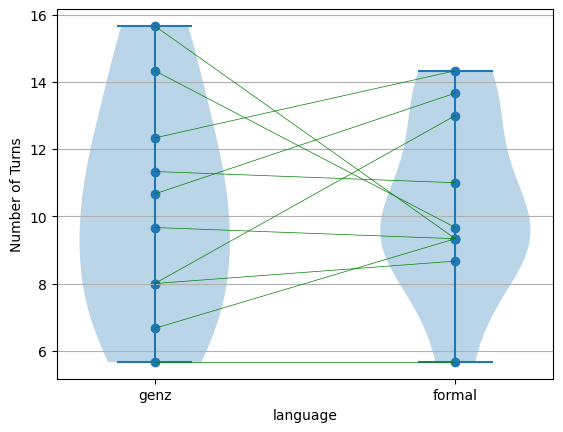

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as lines


fig, axes = plt.subplots()
turns_df_languages = pd.DataFrame({"formal": df[df["language"].str.match("formal")]["number_of_turns"].astype("float").values,
                          "genz": df[df["language"].str.match("genz")]["number_of_turns"].astype("float").values })
axes.scatter(data=df, x="language", y="number_of_turns")
axes.violinplot(dataset = turns_df_languages, positions=[1,0])
axes.set_title('')
axes.yaxis.grid(True)
axes.set_xlabel('language')
axes.set_ylabel('Number of Turns')
dots = axes.collections[0].get_offsets()
for dot_index in range(int(len(dots) / 2)):
    line = lines.Line2D([ 0,1], [dots[dot_index][1],dots[dot_index + int(len(dots) / 2)][1]],
                     color='green', linestyle='-', linewidth=0.5)
    
    axes.add_line(line)

#ax = df.plot.scatter(x='language', y='CUQ', style='b')
plt.show()

In [ ]:
total = pd.concat([turns_df_languages["genz"],turns_df_languages["formal"]])
print("mean of genz and formal and total:", np.mean(turns_df_languages["genz"]), np.mean(turns_df_languages["formal"]), np.mean(total))
print("median of genz and formal and total:", np.median(turns_df_languages["genz"]), np.median(turns_df_languages["formal"]), np.median(total))
print("standard deviation of genz and formal and total:", np.std(turns_df_languages["genz"]), np.std(turns_df_languages["formal"]), np.std(total))

mean of genz and formal and total: 10.233333333333334 10.4 10.316666666666668
median of genz and formal and total: 10.166666666666666 9.5 9.666666666666666
standard deviation of genz and formal and total: 3.098565976562563 2.502443250549794 2.8175541008312703


In [ ]:
import scipy.stats as stats
print("ttest:" , stats.ttest_ind(a = turns_df_languages["formal"], b= turns_df_languages["genz"]))
print("wilcoxon:" , stats.wilcoxon(x = turns_df_languages["formal"], y= turns_df_languages["genz"]))


ttest: TtestResult(statistic=0.1255372986970487, pvalue=0.90148970444542, df=18.0)
wilcoxon: WilcoxonResult(statistic=19.0, pvalue=0.6784023758521882)


/home/robin/anaconda3/envs/uu_courses/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/robin/anaconda3/envs/uu_courses/lib/python3.11/site-packages/scipy/stats/_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
